#7회차 학습 목표
- 데이터프레임 처리 연습
- 비지도학습 소개
- 군집 분석
- 패턴 발견
- 추천 기법(협업필터링) 1/2

#0. 데이터프레임 리뷰

DB에 있는 각 row들을 가시적으로 보기 쉽게 바꿔줘야 분석하기도 보기도 쉽다.
ex) [[a, 1, 100], [a, 2, 100], [a, 2, 400], [b, 1, 5], [b, 1, 100], [b, 3, 500]]
 -> {
  a:{1:{100}, 2:{100, 400}}
  , b:{1: {5, 100}, 3:{500} }
  }
자주 사용하게 되는게 pivot과 groupby
(외에도 map, apply, applymap ...)

##1)DataFrame + Pivot

In [ ]:
#pivot+Heatmap
#pivot
import pandas as pd
df1 = pd.DataFrame( {'x':['A','B', 'C', 'D', 'E', 'F'], 'y':[2021,2021,2021,2022,2022,2022], 'z':[1,2,3,4,5,6]})
print(df1)

   x     y  z
0  A  2021  1
1  B  2021  2
2  C  2021  3
3  D  2022  4
4  E  2022  5
5  F  2022  6


In [ ]:
#x: 행 y: 컬럼, z: x와 y에 대응하는 값
df1.pivot(index='x',columns='y', values='z').fillna(0) #index 중복 없어야 함.
#y컬럼의 값이 같은 상황에서 x컬럼의 값이 중복되면 안됨

y,2021,2022
x,,
A,1.0,0.0
B,2.0,0.0
C,3.0,0.0
D,0.0,4.0
E,0.0,5.0
F,0.0,6.0


In [ ]:
import seaborn as sns
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472


<ipython-input-45-a10cc94b5e5f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = flights.pivot('month', 'year', 'passengers') #행, 열 지정, 값 지정


<Axes: xlabel='year', ylabel='month'>

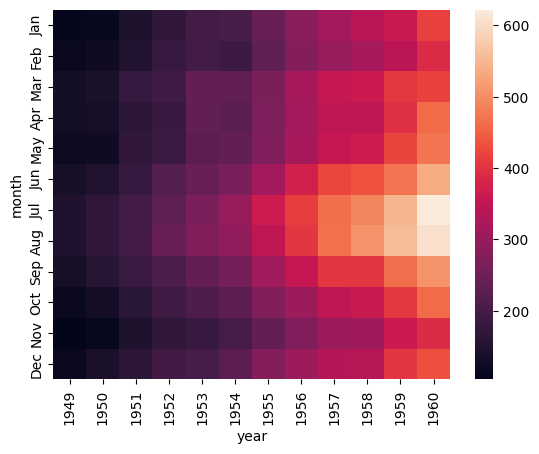

In [ ]:
df = flights.pivot('month', 'year', 'passengers') #행, 열 지정, 값 지정
print(df.head())
sns.heatmap( df )

## 2) group by 응용

In [ ]:
import pandas as pd

df = pd.read_excel('OnlineRetail2.xlsx')#출처: UCI machine learning databases
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    29999 non-null  object        
 1   StockCode    29999 non-null  object        
 2   Description  29885 non-null  object        
 3   Quantity     29999 non-null  int64         
 4   InvoiceDate  29999 non-null  datetime64[ns]
 5   UnitPrice    29999 non-null  float64       
 6   CustomerID   19956 non-null  float64       
 7   Country      29999 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
df.Quantity.astype("float")
df.Quantity.astype("str").astype("int")

0        6
1        6
2        8
3        6
4        6
        ..
29994    3
29995    1
29996    2
29997    1
29998    1
Name: Quantity, Length: 29999, dtype: int64

In [ ]:
#자료 정리
df['Description'] = df['Description'].str.strip()	#Description 컬럼의 문자열 전후 공백 정리

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')		#InvoiceNo을 문자열로 변경

In [ ]:
df['InvoiceNo'].str.contains('C')

0        False
1        False
2        False
3        False
4        False
         ...  
29994    False
29995    False
29996    False
29997    False
29998    False
Name: InvoiceNo, Length: 29999, dtype: bool

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [ ]:
df = df[~df['InvoiceNo'].str.contains('C')]		#InvoiceNo 중 정상적이지 않은 거래 건(C문자 포함 거래) 제외

In [ ]:
grouped = df.groupby(['InvoiceNo', 'Description'])['Quantity']

In [ ]:
grouped

In [ ]:
grouped.mean() # grouped.sum()

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER         8.0
           GLASS STAR FROSTED T-LIGHT HOLDER      6.0
           KNITTED UNION FLAG HOT WATER BOTTLE    6.0
           RED WOOLLY HOTTIE WHITE HEART.         6.0
           SET 7 BABUSHKA NESTING BOXES           2.0
                                                 ... 
538839     SILVER CHRISTMAS TREE BAUBLE STAND     2.0
           SKULL SHOULDER BAG                     2.0
           VINTAGE CREAM 3 BASKET CAKE STAND      1.0
           WALL MIRROR RECTANGLE DIAMANTE PINK    1.0
           WOOD S/3 CABINET ANT WHITE FINISH      1.0
Name: Quantity, Length: 28585, dtype: float64

In [ ]:
grouped.mean().unstack().fillna(0)

Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
grouped.mean().unstack().fillna(0).reset_index()
#set_index(): 컬럼을 이용해서 인덱스 설정, drop, inplace 등의 옵션
#reset_index(): 기존 인덱스를 컬럼으로, 인덱스는 일련번호로 설정

Description,InvoiceNo,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
0,536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,538830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1080,538831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081,538832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1082,538836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#basket 형태로 변경
# 두 컬럼을 기준으로 Quantity값을 정리/ 합계구하고, 형태 변환 / index새로 생성/NaN값은0변환 / InvoiceNo으로 index 설정
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket

Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3) apply, applymap, replace, map

In [ ]:
#binarize
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


In [ ]:
basket.iloc[:, 0].apply(encode_units)

InvoiceNo
536365    0
536366    0
536367    0
536368    0
536369    0
         ..
538830    0
538831    0
538832    0
538836    0
538839    0
Name: *Boombox Ipod Classic, Length: 1084, dtype: int64

In [ ]:
basket.apply(encode_units) #하나의 컬럼이 아니라 여러 컬럼에 적용은 불가하다.

In [ ]:
type(basket)

#전체 자료에 함수 적용
basket_sets = basket.applymap(encode_units)
basket_sets.columns
basket_sets

Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#불필요한 컬럼 제거
basket_sets.drop('POSTAGE', inplace=True, axis=1) #열방향, 컬럼 제거거
basket_sets.drop('amazon', inplace=True, axis=1) #inplace=True, 원래 df에 적용시키기기
basket_sets.drop('check', inplace=True, axis=1)
basket_sets.drop('faulty', inplace=True, axis=1)
basket_sets.drop('damages', inplace=True, axis=1)


In [ ]:
type(basket_sets)
basket_sets

Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df에서 CustomerID로 groupby하고 Quantity의 합계를 구하기
df.groupby(['CustomerID'])['Quantity'].sum()

#df의 InvoiceNo로 index를 지정
df.set_index("InvoiceNo", drop=True)

#df에서 컬럼별 결측치 비율을 출력
df.isnull().mean()
df.isnull().any()
df.dropna(subset=["CustomerID", "InvoiceNo"])#지정된 컬럼의 결측치가 있으면 행 삭제

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
29994,538839,20780,BLACK EAR MUFF HEADPHONES,3,2010-12-14 13:10:00,5.49,14606.0,United Kingdom
29995,538839,21874,GIN AND TONIC MUG,1,2010-12-14 13:10:00,1.25,14606.0,United Kingdom
29996,538839,21934,SKULL SHOULDER BAG,2,2010-12-14 13:10:00,1.65,14606.0,United Kingdom
29997,538839,22299,PIG KEYRING WITH LIGHT & SOUND,1,2010-12-14 13:10:00,1.25,14606.0,United Kingdom


In [ ]:
df.replace("United Kingdom","")
df.Country.replace("United Kingdom","")

0         
1         
2         
3         
4         
        ..
29994     
29995     
29996     
29997     
29998     
Name: Country, Length: 29505, dtype: object

In [ ]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus'], dtype=object)

In [ ]:
dic ={"United Kingdom":"UK", "France":"FR", "Australia":"AU", "Netherlands":"NL", "Germany":"DE", "Norway":"NW", "EIRE":"EI", "Switzerland":"Swiss", "Spain":"ES","Poland":"PL","Portugal":"PG",
      "Italy":"IL", "Belgium":"BG", "Lithuania":"LI", 'Japan':"JN", 'Iceland':"IC",'Channel Islands':"CI", 'Denmark':"DM", 'Cyprus':"CY"}
df.Country.apply(lambda x : x.replace(x, dic[x]))

0        UK
1        UK
2        UK
3        UK
4        UK
         ..
29994    UK
29995    UK
29996    UK
29997    UK
29998    UK
Name: Country, Length: 29505, dtype: object

In [ ]:
df.Country.apply(lambda x : dic[x]) #대응되는 값이 없으면 에러뜸

0        UK
1        UK
2        UK
3        UK
4        UK
         ..
29994    UK
29995    UK
29996    UK
29997    UK
29998    UK
Name: Country, Length: 29505, dtype: object

In [ ]:
df.Country.map(dic) # 일정한 dic 규칙으로 변경할 경우 map쓰면된다.

0        UK
1        UK
2        UK
3        UK
4        UK
         ..
29994    UK
29995    UK
29996    UK
29997    UK
29998    UK
Name: Country, Length: 29505, dtype: object

In [ ]:
dic1 ={"United Kingdom":"UK"} #대응되지 않는 값의 경우 결측치로 처리한다.
df.Country.map(dic1)

0        UK
1        UK
2        UK
3        UK
4        UK
         ..
29994    UK
29995    UK
29996    UK
29997    UK
29998    UK
Name: Country, Length: 29505, dtype: object

In [ ]:
#data_3.csv를 읽어서 user	artist	qty
#문자열은 strip()
d3 = pd.read_csv("data_3.csv")
d3["artist"] = d3["artist"].str.strip()
d3p = d3.pivot('user','artist', 'qty').fillna(0)
#print(d3p)
d3g = d3.groupby(['user', 'artist'])['qty'].sum().unstack().fillna(0)
print(d3g)

artist  ...and you will know us by the trail of dead  2pac  3 doors down  \
user                                                                       
1                                                0.0   0.0           0.0   
3                                                0.0   0.0           0.0   
4                                                0.0   0.0           0.0   
5                                                0.0   0.0           0.0   
6                                                0.0   0.0           0.0   
...                                              ...   ...           ...   
1308                                             0.0   0.0           0.0   
1309                                             0.0   0.0           0.0   
1310                                             0.0   0.0           0.0   
1311                                             0.0   0.0           0.0   
1312                                             1.0   0.0           0.0   

artist  30 

<ipython-input-71-55a6e8a7e0c0>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  d3p = d3.pivot('user','artist', 'qty').fillna(0)


#1. Clustering (군집분석)

- Unsupervised Learning: Y label이 없는 데이터에서 패턴을 찾는 방법
- Clustering: 거리가 가까운 관측치들 간 유사한 특징이 있을 것이라는 가정을 기반으로 변수들을 군집화
  - 정답이 없으므로 탐색 인사이트 용도로 사용
  - 대부분 optimization 문제를 푸는 경우가 많음
  - 1) 계층적 클러스터링 (hierarchical clustering)과 2) 비계층적 클러스터링(K-means clustering)으로 구분됨
    - 1) 거리행렬을 기반으로 가까운 대상끼리 순차적으로 그룹을 할당
    - 2) 랜덤한 시작점에서 해당 점과 가까운 대상 간 그룹 할당

- 이상치가 존재할 경우 클러스터링 진행 시 영향을 많이 받을 수 있으므로 사전에 제거 과정이 필요

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import pandas as pd
data = pd.read_csv('fa_data_bfi.csv')

In [ ]:
print( data.head() )
print('\n', data.shape)

   Neuroticism  Extraversion  Conscientiousness  Agreeableness   Openess
0    -0.439830      0.103897          -1.216713      -0.696215 -1.519449
1     0.084369      0.559311          -0.601521      -0.189341 -0.248384
2     0.520534      0.318235           0.025646      -0.751136  0.204503
3    -0.197064      0.057696          -1.019263       0.064286 -1.029492
4    -0.329835      0.408754          -0.058843      -0.820454 -0.691042

 (2436, 5)


In [ ]:
# 이상치 제거 함수 (1Q - 1.5*IQR, 3Q + 1.5*IQR 을 넘어가는 값을 가진 행을 제거)
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight

  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight

  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [ ]:
for col in data.columns:
    outlier_idx = get_outlier(df=data, column=col, weight=1.5)
    data.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
print(data.head())
print('\n', data.shape)

   Neuroticism  Extraversion  Conscientiousness  Agreeableness   Openess
0    -0.439830      0.103897          -1.216713      -0.696215 -1.519449
1     0.084369      0.559311          -0.601521      -0.189341 -0.248384
2     0.520534      0.318235           0.025646      -0.751136  0.204503
3    -0.197064      0.057696          -1.019263       0.064286 -1.029492
4    -0.329835      0.408754          -0.058843      -0.820454 -0.691042

 (2335, 5)


- large scale 데이터를 사용할 경우 계산량이 많아지며, 클러스터링 시 값의 range의 영향을 받기 때문에 표준화/scaling이 필요

In [ ]:
data.describe() # 기초통계량

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,0.003113,0.030340,0.025799,0.054182,0.003259
std,0.913940,0.836298,0.821891,0.764686,0.808914
min,-2.011680,-2.287489,-2.320576,-2.107187,-2.294768
25%,-0.718653,-0.498024,-0.526410,-0.439648,-0.570231
50%,-0.056327,0.097684,0.088043,0.142092,0.025512
75%,0.650523,0.655036,0.634843,0.614244,0.609261
max,2.551124,2.336969,1.893386,2.179653,2.011314


In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(data)

In [ ]:
scaled = pd.DataFrame(scaled, columns = data.columns)
scaled.describe() # 기초통계량

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
count,2.335000e+03,2.335000e+03,2.335000e+03,2.335000e+03,2.335000e+03
mean,1.369354e-17,-3.043010e-18,-3.043010e-18,-9.889781e-18,2.890859e-17
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00
min,-2.204987e+00,-2.772128e+00,-2.855461e+00,-2.827083e+00,-2.841488e+00
25%,-7.899000e-01,-6.319241e-01,-6.720208e-01,-6.459321e-01,-7.091154e-01
50%,-6.505121e-02,8.054349e-02,7.574925e-02,1.149865e-01,2.751602e-02
75%,7.085238e-01,7.471380e-01,7.411858e-01,7.325648e-01,7.493164e-01
max,2.788539e+00,2.758732e+00,2.272792e+00,2.780129e+00,2.482941e+00


#2. 계층적 클러스터링 (Hierarchical Clustering)
- 거리 행렬을 기반으로 유사한 관측치끼리 묶음
  - 모든 관측치들 간 거리를 계산함
- 거리를 어떻게 계산할지에 따라 linkage method 구분
  1) 최단연결법 (single): 생성된 군집에서 중심과 거리가 **가까운** 관측치끼리 군집화
  2) 최장연결법 (complete): 생성된 군집에서 중심과 거리가 **먼** 관측치끼리 군집화
  3) 평균연결법 (average): 군집 내 모든 데이터와 다른 군집 내 모든 데이터 간의 거리 **평균**을 계산하여 군집화
  4) 중앙연결법 (centroid): 군집 내 **centroid**과 다른 군집 내 median까지의 거리를 계산하여 가까운 것끼리 군집화
$$\vec{\mu}(\omega_i)\cdot\vec{\mu}(\omega_j)=(\frac{1}{N_i}\sum_{d_m\in\omega_i}\vec{d_m})\cdot(\frac{1}{N_j}\sum_{d_n\in\omega_j}\vec{d_n})=\frac{1}{N_i}\frac{1}{N_j}\sum_{d_m\in\omega_i}\sum_{d_n\in\omega_j}{\vec{d_m}\cdot\vec{d_n}}$$
  5) 와드연결법 (ward): 거리가 아닌, 군집 내 오차 제곱합(within group sum of squares)이 최소가 되도록 최소가 되도록 군집화
$$SSE=\sum^K_{i=1}SSE_i=\sum^{K}_{i=1}\sum^{n_i}_{j=1}\sum^{m}_{k=1}(x_{ijk}-\bar{x}_{ik})^2$$

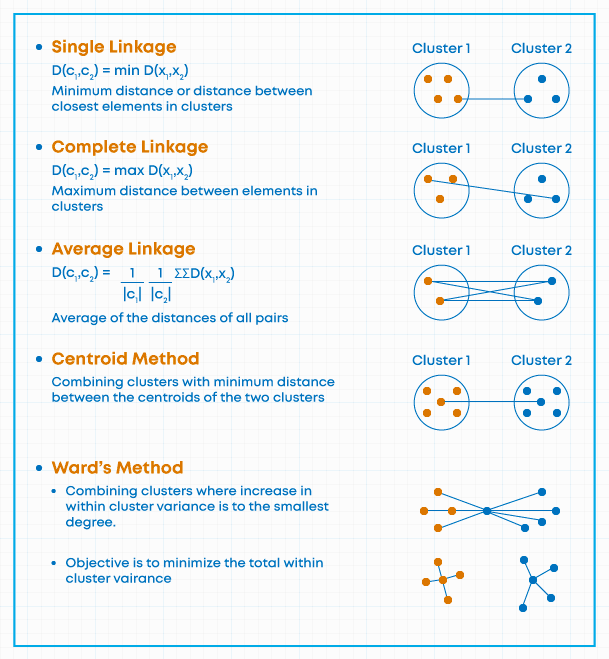
- https://dataaspirant.com/hierarchical-clustering-algorithm/

- 장점
    - 클러스터 생성 과정에 대해 이해할 수 있음
    - 사전에 클러스터의 수를 지정하지 않아도 됨
    - 덴드로그램을 통해 클러스터의 수를 결정하는 과정이 쉬움
- 한계
    - 방대한 양의 데이터에서 제대로 작동하지 않을 수 있음
    - 두 클러스터를 결합한 이후에는 그 전으로 돌아갈 수 없음
    - 노이즈 및 이상값에 대해 민감
    - 데이터의 순서가 최종 결과에 영향을 줄 수 있음

## Step 1. 거리 계산에 따른 클러스터링
- `scipy.cluster.hierarchy`의 `linkage` 사용
- [제공하는 linkage 방식](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)
  -  single, complete, average, centroid, median, ward, weighted
- [제공하는 거리 계산 방식](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist)
  - euclidean distance: real-valued 차원에서 각 관측치들의 location을 기반으로 측정 (Euclidean, manhattan, ...)
    - centroid, median, ward linkage method를 사용할 경우 Euclidean pairwise metric만 활용 가능
  - non-euclidean distance: 각 관측치의 거리가 아닌, properties에 의해 측정 (e.g. cosine, jaccard, ...)
    - 이 외에 clustroid 등의 method를 사용할 때 사용 가능

In [ ]:
data_prime = scaled.copy()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='complete', metric='euclidean')

## Step 2. 군집 수 결정
- 덴드로그램 (dendrogram): 각 단계에서 군집이 어떻게 형성되는지 확인하고 형성된 군집의 유사성(또는 거리) 수준을 평가
  - 덴드로그램을 더 높게 커팅할수록 최종 군집 수는 더 작지만 유사성 수준은 더 낮아짐
  - 덴드로그램을 더 낮게 커팅할수록 유사성 수준은 더 높지만 최종 군집 수는 더 많아짐
  - 일부 데이터 집합의 경우 평균, 중심, 중위수 및 Ward의 연결 방법으로 계층적 덴드로그램이 생성되지 않음. (결합 거리가 각 단계에서 항상 증가하지 않을 수 있음)

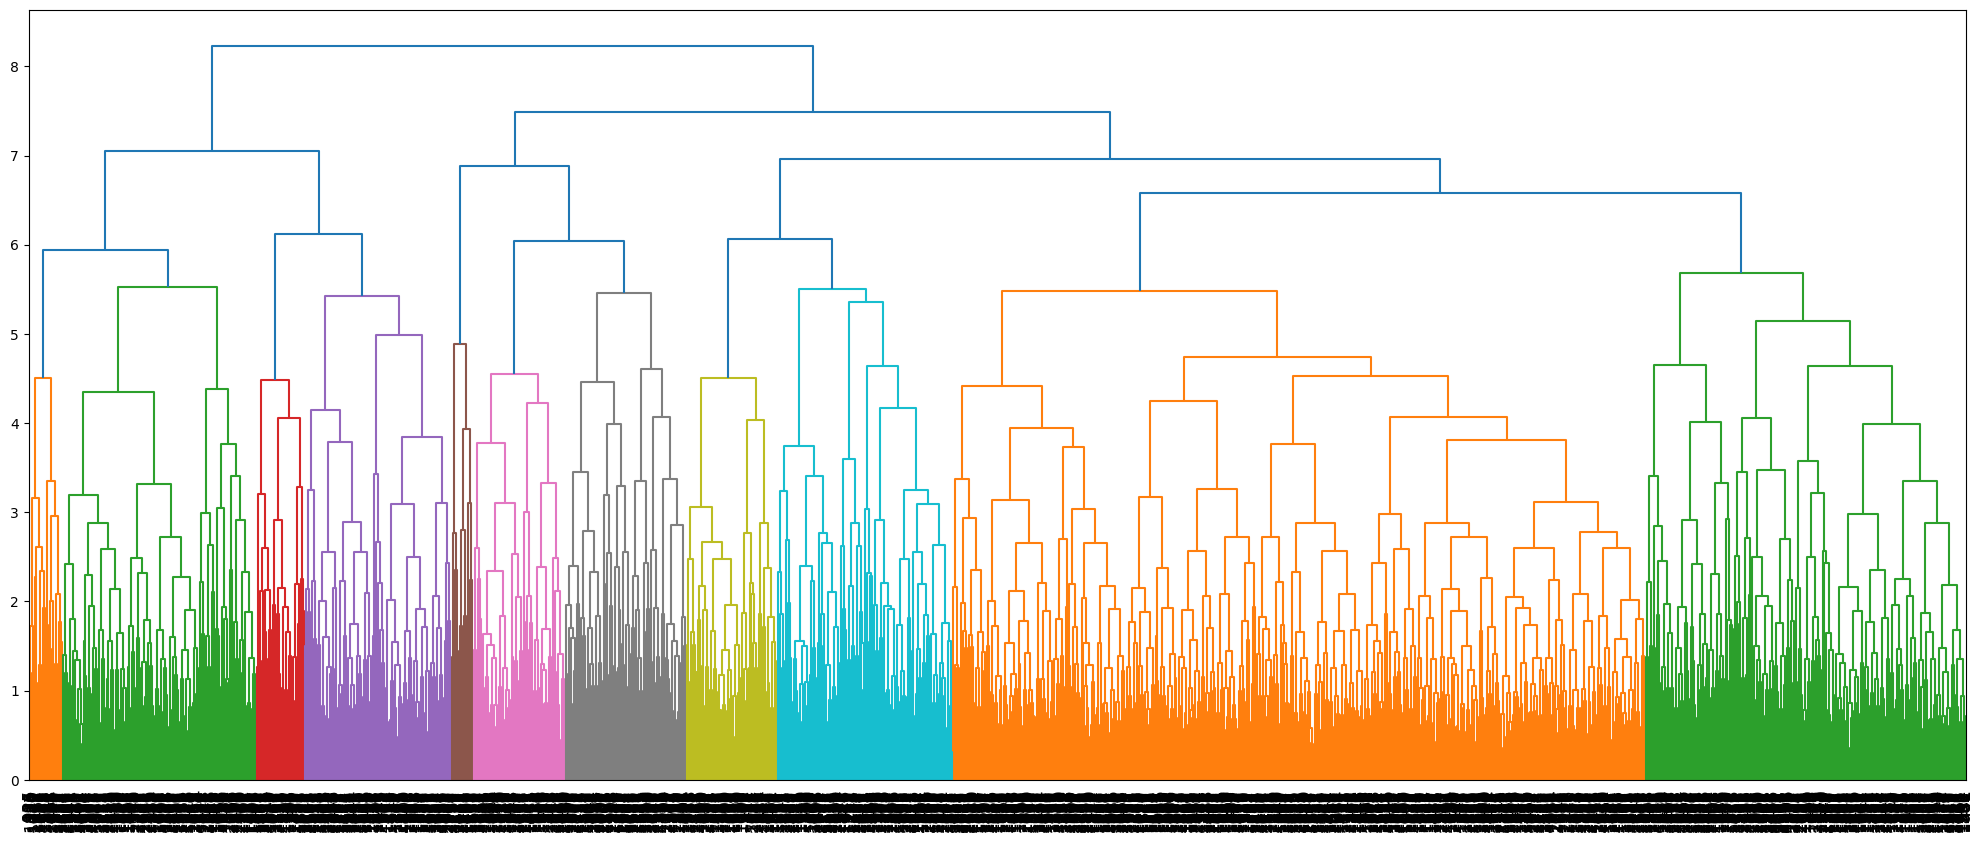

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

- [`fcluster`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)을 사용하여 덴드로그램 결과에 기반한 clustering을 진행

In [ ]:
cut_tree = fcluster(clusters, t=7, criterion='distance')
cut_tree

array([1, 4, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

4    1542
3     283
1     275
2     235
dtype: int64

## Step 3. Evaluation
- 군집 내 비유사성 (within dissimilarities)는 작고 군집 간 비유사성 (between dissimilarities)는 크도록 생성
- 이 때, Silhouette coefficient (실루엣 계수)는 각 관측치와 주위 관측치과의 거리 계산을 통해 군집 내 비유사성과 군집 간 비유사성의 정도를 평가
  - 데이터 양이 많아질수록 time complexity가 높음

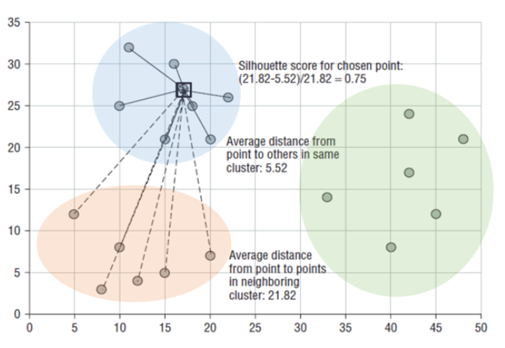
- https://ariz1623.tistory.com/224

- `silhouette_samples`를 통해 coefficient를 계산, `silhouette_score`를 통해 모든 coefficient의 평균을 계산

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:', average_score)

Silhouette Score: [0.26399624 0.04965367 0.02685061 0.23496799 0.11082033] 
Silhouette Score shape: (2335,) 

Silhouette Average Score: 0.05878838790412343


1. 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것
1. 개별 클러스터의 실루엣 계수 평균값의 편차가 작아야 함
  - 클러스터 내 실루엣 계수 평균값을 확인하여, 1에 가까운 클러스터를 'clear-cut cluster', 0에 가까운 클러스터를 'weak cluster'로 표현

In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,hc_cluster,silhouette_coeff
0,-0.484757,0.087974,-1.512096,-0.981524,-1.882814,1,0.263996
1,0.088926,0.632650,-0.763428,-0.318530,-0.311154,4,0.049654
2,0.566265,0.344323,-0.000187,-1.053360,0.248836,3,0.026851
3,-0.219074,0.032717,-1.271806,0.013216,-1.276987,1,0.234968
4,-0.364378,0.452584,-0.103007,-1.144029,-0.858497,1,0.110820
...,...,...,...,...,...,...,...
2330,1.192595,1.276914,-0.168496,-0.098960,-1.108426,4,0.041472
2331,1.428117,-1.414563,-0.158201,-1.570383,0.505457,3,0.027685
2332,0.798209,0.265352,-0.746378,-0.486530,1.264070,3,-0.045137
2333,-0.247750,0.826233,0.926490,-1.455368,1.139852,3,0.096256


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.155768
2    0.082219
3    0.057706
4    0.038121
Name: silhouette_coeff, dtype: float64
표준편차: 0.05147475615133177


hc
1     0.450077
2     0.237899
3     0.544735
4     0.370374
5     0.699690
6     0.430433
7     0.323348
8     0.219677
9     0.367891
10    0.282815
11    0.231659
12    0.124296
13    0.480573
14    0.052667
15    0.298134
16    0.063800
17    0.315969
18    0.150422
19    0.364815
20    0.470467
21    0.000000
22    0.587380
23    0.390114
24    0.591747
25    0.445299
26    0.869499
27    0.736155
28    0.362850
29    0.440068
30    0.328184
31    0.518604
32    0.294211
33    0.608426
34    0.467835
35    0.765987
36    0.512632
37    0.447036
38    0.496093
39    0.292935
40    0.461632
41    0.251907
Name: ss, dtype: float64

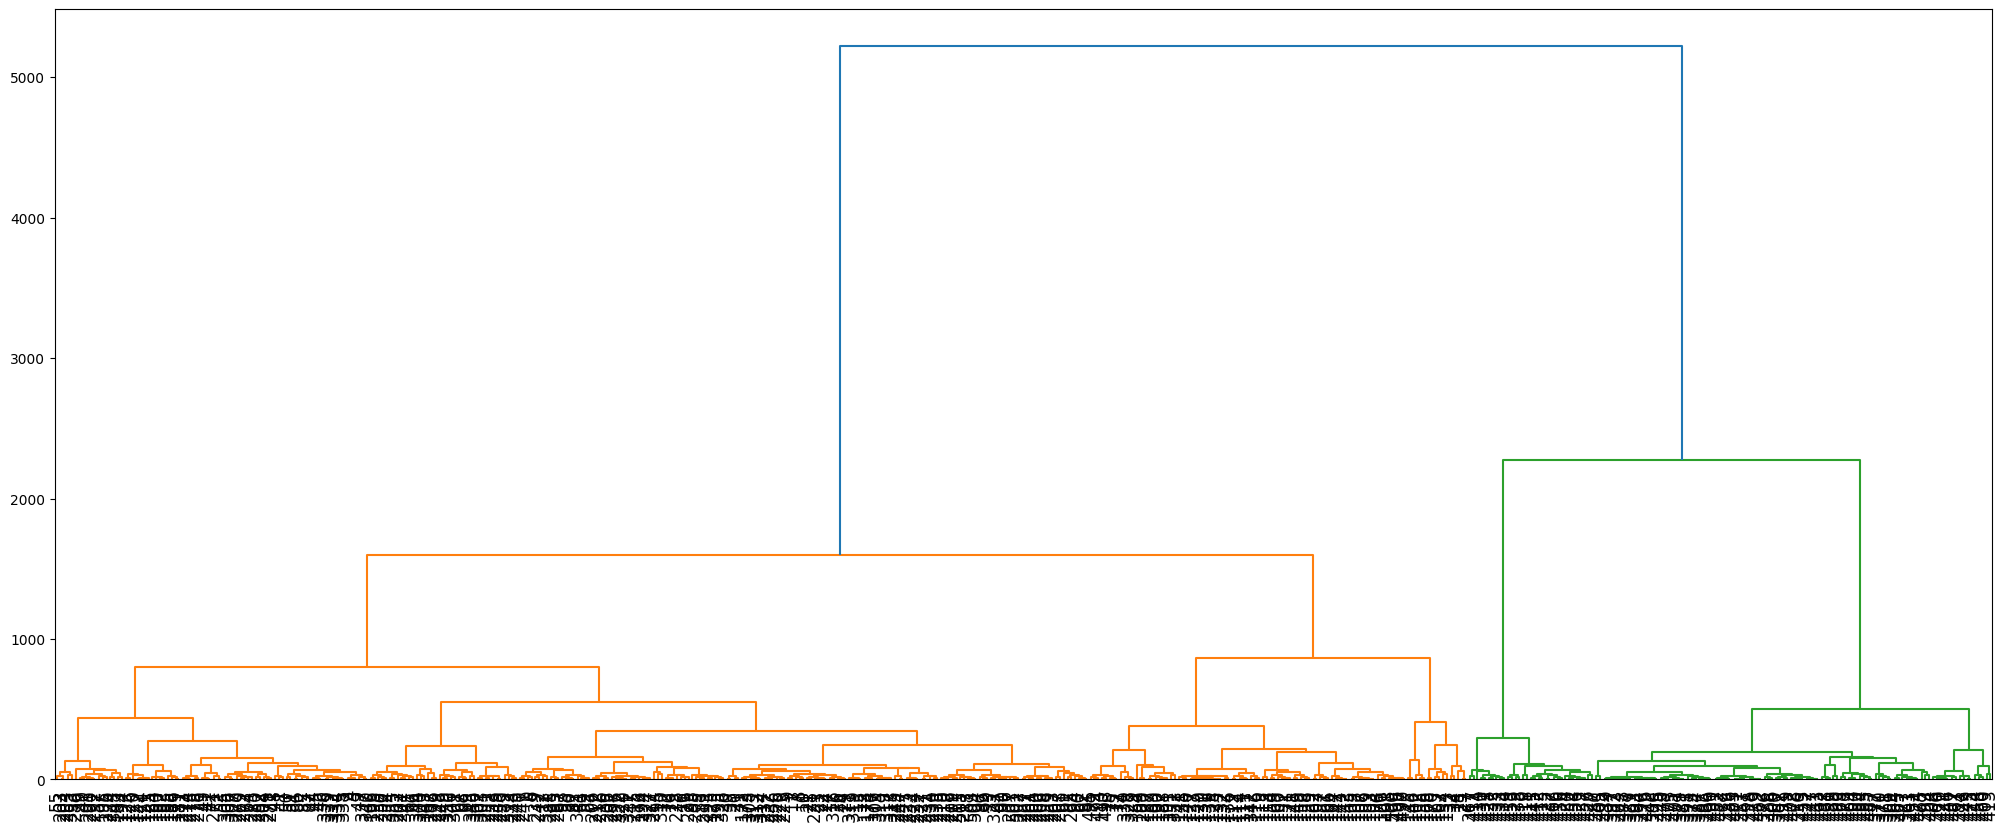

In [ ]:
#boston 데이터셋에 대해서 hc를 적용하세요
#1) linkage method는 ward로
#2) 덴드로그램 그리기
#3) 적절한 군집수를 발견
#4) 군집별 실루엣 coeff의 평균

bt = pd.read_csv("BostonHousing.csv")

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
bt_clusters = linkage(y=bt, method='ward', metric='euclidean')

import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(bt_clusters, leaf_rotation=90, leaf_font_size=12,)
#plt.show()

from sklearn.metrics import silhouette_samples, silhouette_score

cut_tree = fcluster(bt_clusters, t=100, criterion='distance')

score_samples = silhouette_samples(bt, cut_tree)
#print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(bt, cut_tree)
# np.mean(score_samples) == average_score: True
#print('Silhouette Average Score:', average_score)

bt["hc"] = cut_tree
bt["ss"] = score_samples

bt.groupby("hc")["ss"].mean()

## Step 4. EDA

In [ ]:
# 군집별 통계(평균)
cluster_g = data_prime.groupby('hc_cluster')
cluster_g.mean()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,silhouette_coeff
hc_cluster,,,,,,
1,-0.202224,-0.476430,-0.354750,0.008229,-1.193593,0.155768
2,0.641531,-0.987144,0.818133,0.047872,0.429910,0.082219
3,-0.202057,-0.504072,-0.200515,-1.428871,0.369076,0.057706
4,-0.024621,0.327918,-0.024617,0.253474,0.079611,0.038121


In [ ]:
# 군집별 통계(표준편차)
cluster_g.std()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,silhouette_coeff
hc_cluster,,,,,,
1,0.961289,0.731722,1.000291,0.855926,0.599619,0.090031
2,0.898211,0.795442,0.797586,0.970096,1.129314,0.121418
3,0.873832,1.061641,1.110190,0.690878,1.062821,0.136505
4,1.005253,0.879968,0.939506,0.845658,0.858583,0.126445


- Cluster1: 개방적이지 않은(-O) 사람
- Cluster2: 신경질적(N)인데 외향적이지 않으며(-E) 성실한(C) 사람
- Cluster3: 외향적이지 않고(-E) 쾌활하지 않은(-A) 사람
- Cluster4: 큰 특징이 존재하지 않는 사람

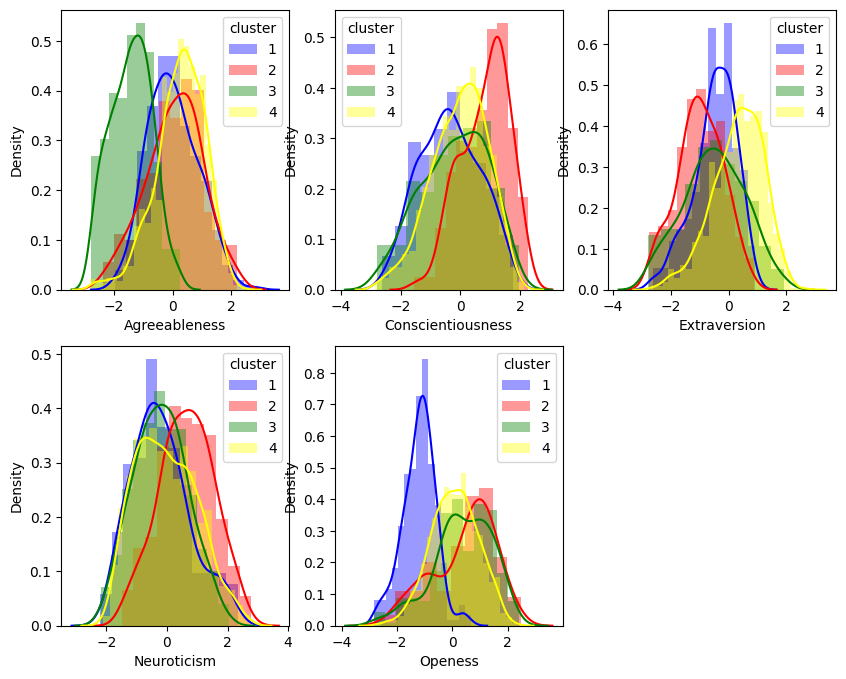

In [ ]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.distplot(data_prime[data_prime.hc_cluster == 1]["Agreeableness"],
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["Agreeableness"],
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["Agreeableness"],
             color="green", label=3)
sns.distplot(data_prime[data_prime.hc_cluster == 4]["Agreeableness"],
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,2)
sns.distplot(data_prime[data_prime.hc_cluster == 1]["Conscientiousness"],
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["Conscientiousness"],
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["Conscientiousness"],
             color="green", label=3)
sns.distplot(data_prime[data_prime.hc_cluster == 4]["Conscientiousness"],
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,3)
sns.distplot(data_prime[data_prime.hc_cluster == 1]["Extraversion"],
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["Extraversion"],
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["Extraversion"],
             color="green", label=3)
sns.distplot(data_prime[data_prime.hc_cluster == 4]["Extraversion"],
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,4)
sns.distplot(data_prime[data_prime.hc_cluster == 1]["Neuroticism"],
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["Neuroticism"],
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["Neuroticism"],
             color="green", label=3)
sns.distplot(data_prime[data_prime.hc_cluster == 4]["Neuroticism"],
             color="yellow", label=4)
plt.legend(title="cluster")

plt.subplot(2,3,5)
sns.distplot(data_prime[data_prime.hc_cluster == 1]["Openess"],
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["Openess"],
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["Openess"],
             color="green", label=3)
sns.distplot(data_prime[data_prime.hc_cluster == 4]["Openess"],
             color="yellow", label=4)
plt.legend(title="cluster")

plt.show()

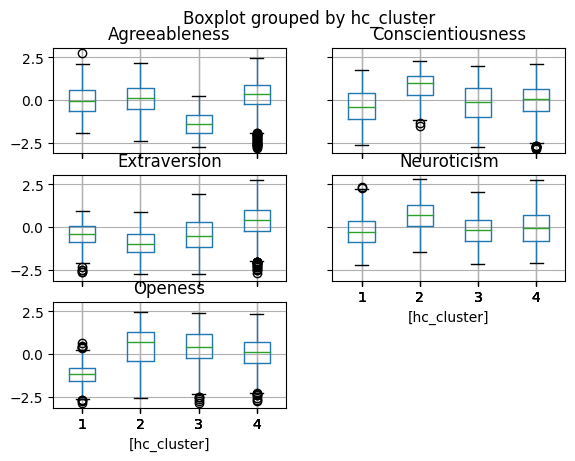

In [ ]:
# 시각화방법 2
import matplotlib.pyplot as plt
data_prime.drop('silhouette_coeff', axis=1).boxplot(by='hc_cluster')
plt.show()

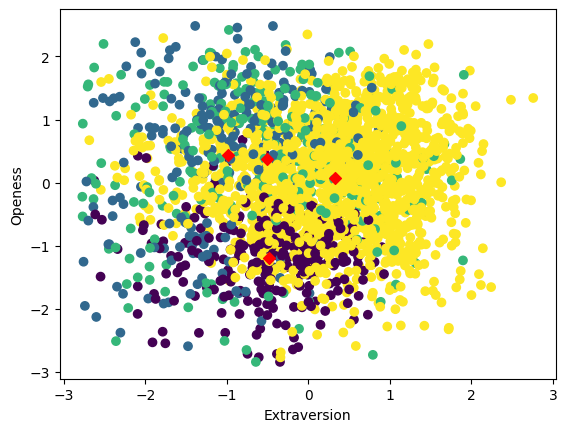

In [ ]:
# 시각화방법 3
plt.scatter(x=data_prime['Extraversion'], y=data_prime['Openess'], c=data_prime['hc_cluster']) # 각 cluster 좌푯값 시각화

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,1], y=hc_centers[:,4], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.xlabel('Extraversion')
plt.ylabel('Openess')
plt.show()

# 3. k-평균 클러스터링 (K-means Clustering)
- Euclidean space를 가정
  1) 클러스터의 개수 k를 선정
  2) 데이터셋에서 k개의 centroids를 임의로 지정
  3) 각 데이터들을 가장 가까운 centroids가 속한 그룹에 할당
  4) 각 클러스터의 centroids 다시 계산 (일반적으로 유클리드 거리 사용)
  5) 3, 4번 과정을 centroids가 더 이상 변하지 않을 때까지/지정된 횟수까지 반복

- 한계
  - K 결정이 주관적
  - 여러 초기값이 동일 군집에 존재할 경우 최종 결과가 이상해질 수 있음
  - 크기가 작은 그룹에서는 제대로 작동하지 않을 수 있음
  - 반복 특성과 centroid를 random하게 초기화하기 때문에 local optimum에 고착, global optimum에 수렴되지 않을 수 있음

- Extensions
    - k-means에서 initial points로 비슷한 점들이 여러 개 선택되는 경우 불안정한 군집을 학습하게 됨
    - `k-means++`: 1) 첫 initial point를 임의로 선택, 2) 이후의 initial points는 과거 initial points와 멀리 떨어지도록 분포를 조절하여 진행
        - 문서의 bag of words와 같이, 고차원의 sparse 데이터를 군집화하는 과정에서, 대부분의 데이터 간 거리가 유사할 경우 k-means++를 적용하는 것은 expensive한 버전의 random sampling을 수행하는 것과 같음
    - `SphericalKMeans`: k-means++가 가지는 한계를 완화하기 위해 등장. 2)에서 다음 initial points가 멀리 떨어지도록 조절하는 과정에서 거리가 threshold 이하인 점들을 제거 후 random하게 initial points 선택
    - k-medoid: 임의의 점으로 초기화하는 kmeans와 달리 특정 점을 medoid로 사용
      - large data에 잘 먹지 않을 수 있음
    - fuzzy c-means clustering (soft clustering)


In [ ]:
data_prime = data.copy()

## Step 1. K 선정
1. EDA: 데이터의 형태를 살펴보고 manually 결정
2. Elbow method: 클러스터의 개수를 늘려가며 SSE를 계산, SSE가 줄어드는 비율이 급격히 작아지는 부분을 elbow라 설정
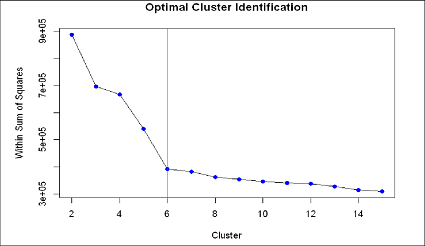
3. Silhouette score
4. Calinski Harabasz score: Variance Ratio Criterio이라고도 알려짐. between-clusters dispersion mean 과 within-cluster dispersion의 비율. 값이 높을수록 군집화가 잘 되었음을 의미

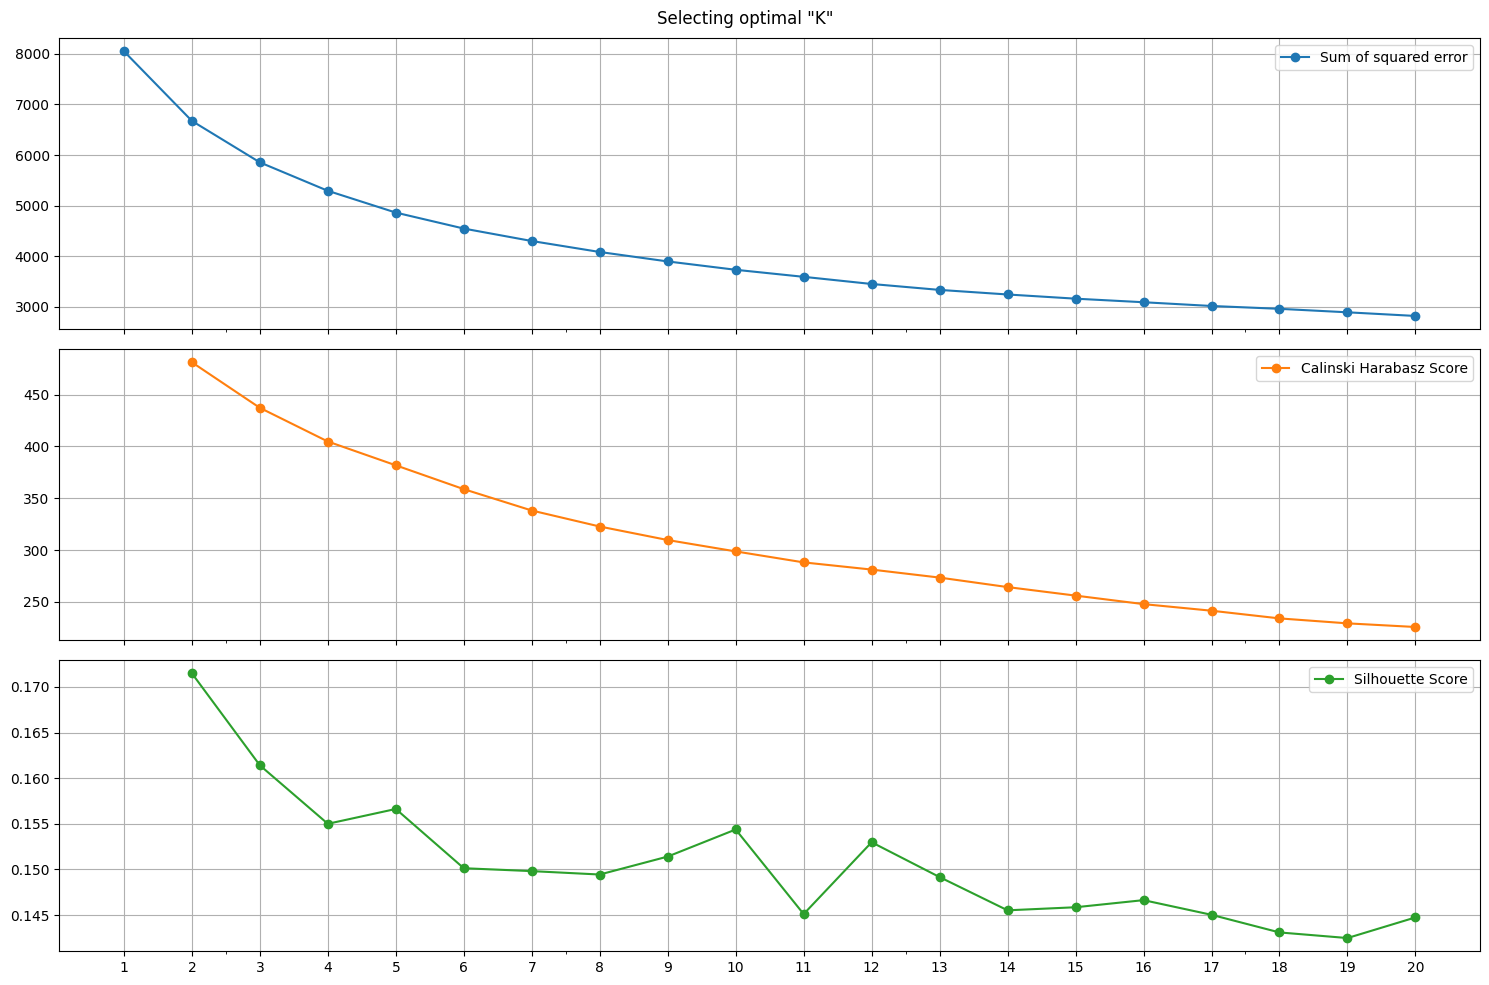

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_prime)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_prime)
        chs = calinski_harabasz_score(data_prime, cluster)
        ss = silhouette_score(data_prime, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

## Step 2. K-means clustering

In [ ]:
model = KMeans(n_clusters=5, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(algorithm='auto', n_clusters=5, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([3, 3, 4, ..., 4, 0, 2], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centers = model.cluster_centers_
pd.DataFrame(centers, columns = data.columns)

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
0,-0.747647,0.422308,0.522702,0.355185,0.267290
1,0.102650,-0.217124,0.229613,-0.212094,-1.008630
2,0.174221,-1.005625,0.000890,-0.619786,0.587663
3,-0.331343,0.106151,-1.030252,0.252091,-0.126438
4,1.107615,0.445493,0.117704,0.227376,0.267516


In [ ]:
#boston으로 k-means
import pandas as pd
from sklearn.cluster import KMeans

bt = pd.read_csv("BostonHousing.csv")
for k in [4,8,12,16,20]:
  print("KMeans - ", KMeans(n_clusters=k).fit(bt).inertia_)

#centers = btm.cluster_centers_
#pd.DataFrame(centers, columns = bt.columns)


KMeans -  1814437.500956777
KMeans -  879556.7673984682
KMeans -  603422.9209870602
KMeans -  476549.30995844654
KMeans -  362349.47537650034


## Step 3. Evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:', k_average_score)

Average Silhouette Score: 0.2975615287564289


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.374405
1    0.232513
2    0.235741
3    0.279529
4    0.318423
Name: k_silhouette_coeff, dtype: float64

## Step 4. EDA

In [ ]:
# 군집별 통계
data_prime.groupby('k_means_cluster').mean()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,k_silhouette_coeff
k_means_cluster,,,,,,
0,-0.747647,0.422308,0.522702,0.355185,0.267290,0.374405
1,0.102650,-0.217124,0.229613,-0.212094,-1.008630,0.232513
2,0.174221,-1.005625,0.000890,-0.619786,0.587663,0.235741
3,-0.331343,0.106151,-1.030252,0.252091,-0.126438,0.279529
4,1.107615,0.445493,0.117704,0.227376,0.267516,0.318423


- Cluster0: 신경질적이지 않고(-N) 성실한(C) 사람
- Cluster1: 개방적이지 않은(-O) 사람
- Cluster2: 외향적이지 않고(-E) 쾌활하지 않은(-A) 사람
- Cluster3: 성실하지 않은(-C) 사람
- Cluster4: 신경질적인(N) 사람

In [ ]:
data_prime.groupby('k_means_cluster').std()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,k_silhouette_coeff
k_means_cluster,,,,,,
0,0.515664,0.595511,0.491930,0.622350,0.593479,0.091253
1,0.751084,0.718431,0.675426,0.724939,0.475892,0.087392
2,0.771411,0.626666,0.745757,0.748576,0.654246,0.090274
3,0.651125,0.757420,0.514657,0.679503,0.698537,0.093927
4,0.548380,0.657630,0.743163,0.665218,0.624678,0.090962


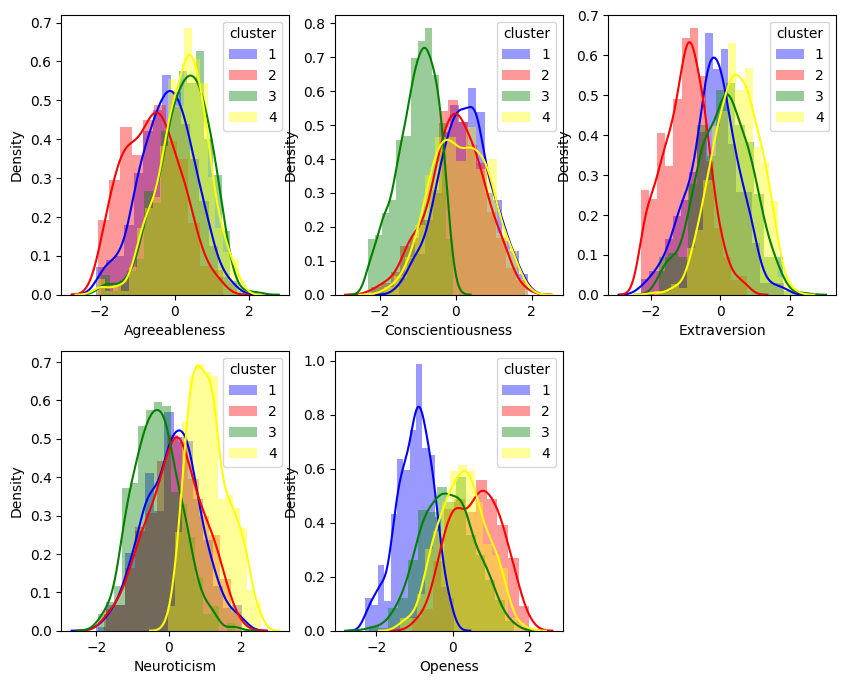

In [ ]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["Agreeableness"],
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["Agreeableness"],
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 3]["Agreeableness"],
             color="green", label=3)
sns.distplot(data_prime[data_prime.k_means_cluster == 4]["Agreeableness"],
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,2)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["Conscientiousness"],
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["Conscientiousness"],
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 3]["Conscientiousness"],
             color="green", label=3)
sns.distplot(data_prime[data_prime.k_means_cluster == 4]["Conscientiousness"],
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,3)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["Extraversion"],
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["Extraversion"],
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 3]["Extraversion"],
             color="green", label=3)
sns.distplot(data_prime[data_prime.k_means_cluster == 4]["Extraversion"],
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,4)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["Neuroticism"],
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["Neuroticism"],
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 3]["Neuroticism"],
             color="green", label=3)
sns.distplot(data_prime[data_prime.k_means_cluster == 4]["Neuroticism"],
             color="yellow", label=4)
plt.legend(title="cluster")

plt.subplot(2,3,5)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["Openess"],
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["Openess"],
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 3]["Openess"],
             color="green", label=3)
sns.distplot(data_prime[data_prime.k_means_cluster == 4]["Openess"],
             color="yellow", label=4)
plt.legend(title="cluster")

plt.show()

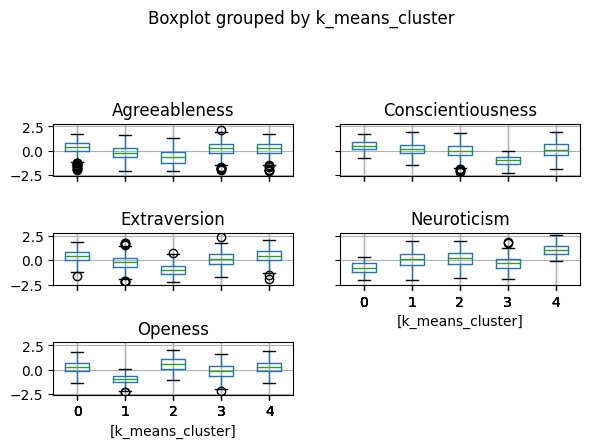

In [ ]:
# 시각화방법 2
data_prime.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

Text(0, 0.5, 'Agreeableness')

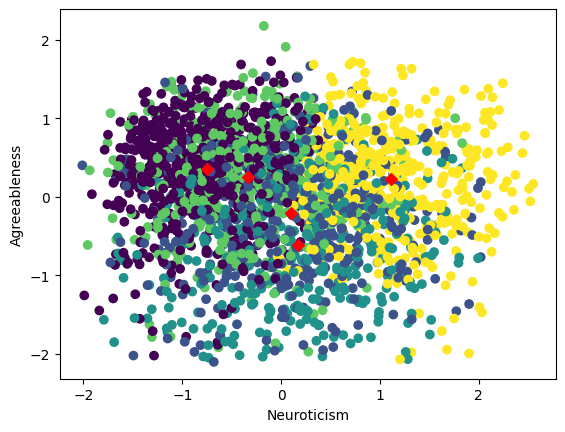

In [ ]:
# 군집결과 시각화
plt.scatter(x=data_prime['Neuroticism'], y=data_prime['Agreeableness'], c=data_prime['k_means_cluster'])
plt.scatter(x=centers[:,0], y=centers[:,3], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('Neuroticism')
plt.ylabel('Agreeableness')

# 4. 연관 규칙 분석: Apriori

- Rule 기반, 장바구니 분석
- 지지도/신뢰도/향상도

### 지지도(Support)

 $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Support = P(A {\cap} B) $

                          품목 A와 품목 B를 포함하는 거래수 / 전체 거래 수

### 신뢰도(Confidence)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Confidence = P(B | A) = {\dfrac {P(A {\cap} B)}{P(A)}} $

                          항목 A의 거래중에서 항목 B가 포함된 거래의 비율
                          지지도(Support) / P(A)

### 향상도(Lift:improvement)

- A ${\rightarrow}$ B 의 연관 규칙에서 임의로(Random) B가 구매되는 경우에 비해 A와의 관계가 고려되어 구매되는 경우의 비율

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Lift = {\dfrac{P(B|A)}{P(B)}} = {\dfrac{P(A{\cap}B)}{P(A)P(B)}} $

                          신뢰도(Confidence) / P(B)




#### 알고리즘

1. k개의 item을 가지고 단일항목집단 생성 (one-item frequent set)
2. 단일항목집단에서 최소 지지도(support) 이상의 항목만 선택
3. 2에서 선택된 항목만을 대상으로 2개항목집단 생성
4. 2개항목집단에서 최소 지지도 혹은 신뢰도 이상의 항목만 선택
5. x 위의 과정을 k개의 k-item frequent set을 생성할 때까지 반복


##### 장점
 - 원리가 간단하여 사용자가 쉽게 이해할 수 있고 의미를 파악할 수 있음
 - 유의한 연관성을 갖는 구매패턴을 찾아줌

##### 단점
 - 데이터가 클 경우 (item이 많은 경우)에 속도가 느리고 연산량이 많음
 - 실제 사용시에 많은 연관상품들이 나타나는 단점이 있음


# 5.FP-Growth
- Apriori의 속도 개선
- FP Tree라는 구조를 사용
- 빈번하게 발생하는 아이템 셋(frequent itemsets)을 효과적으로 발견
- 아이템 간의 연관성을 찾는 것의 어려움: Confidence 등의 계산

### 알고리즘
1. 모든 거래를 확인하여, 각 아이템마다의 지지도(support)를 계산하고 최소 지지도이상의 아이템만 선택
2. 모든 거래에서 빈도가 높은 아이템 순서대로 순서를 정렬
3. 부모 노드를 중심으로 거래를 자식노드로 추가해주면서 tree를 생성
4. 새로운 아이템이 나올 경우에는 부모노드부터 시작하고, 그렇지 않으면 기존의 노드에서 확장
5. 위의 과정을 모든 거래에 대해 반복하여 FP TREE를 만들고 최소 지지도 이상의 패턴만을 추출

#### 장점
- Apriori 알고리즘보다 빠른 탐색
- 후보 Itemsets 을 생성할 필요없이 진행 가능

#### 단점
- Apriori 알고리즘에 비해서 설계하기 어려움
- 지지도의 계산이 FP-Tree가 만들어지고 나서야 가능함

In [ ]:
!pip install -U mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import mlxtend
print(mlxtend.__version__)

0.22.0


In [ ]:
import mlxtend
import numpy as np
import pandas as pd

data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '맥주'],
    ['양상추', '맥주']
])

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [ ]:
%%time
# 9.97ms
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.5, use_colnames=True)

CPU times: user 10.3 ms, sys: 33 µs, total: 10.4 ms
Wall time: 11.1 ms


,support,itemsets
0,0.75,(기저귀)
1,0.75,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,"(맥주, 기저귀)"
5,0.50,"(양상추, 기저귀)"
6,0.50,"(우유, 기저귀)"
7,0.75,"(맥주, 양상추)"
8,0.50,"(맥주, 양상추, 기저귀)"


In [ ]:
d3 = pd.read_csv("data_3.csv")

d3p = d3.pivot('user', 'artist', 'qty')
d3p.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artist,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
user,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%%time
# 1.99ms
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df, min_support=0.5, use_colnames=True)

CPU times: user 2.87 ms, sys: 0 ns, total: 2.87 ms
Wall time: 2.88 ms


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.75,(기저귀)
1,0.50,(우유)
2,0.75,(양상추)
3,0.75,(맥주)
4,0.50,"(맥주, 기저귀)"
5,0.50,"(양상추, 기저귀)"
6,0.50,"(맥주, 양상추, 기저귀)"
7,0.50,"(우유, 기저귀)"
8,0.75,"(맥주, 양상추)"


- (실습)last.fm 데이터에 대해 활용해보세요!

In [ ]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

df = pd.read_csv('data_3.csv')
df.head()

df['artist'] = df['artist'].str.strip()
df.dropna(axis=0, subset=['user'], inplace=True)
df['user'] = df['user'].astype('str')

basket=df.groupby(['user', 'artist'])['qty'].sum().unstack().reset_index().fillna(0).set_index('user')

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['...and you will know us by the trail of dead', '2pac', '3 doors down',
       '30 seconds to mars', '311', '36 crazyfists', '44', '50 cent',
       '65daysofstatic', '[unknown]',
       ...
       'wilco', 'within temptation', 'wolfgang amadeus mozart', 'wu-tang clan',
       'yann tiersen', 'yeah yeah yeahs', 'yellowcard', 'yo la tengo',
       'zero 7', 'Édith piaf'],
      dtype='object', name='artist', length=1004)

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(coldplay),(radiohead),0.149357,0.201780,0.065282,0.437086,2.166147,0.035145,1.418014,0.632875
1,(radiohead),(coldplay),0.201780,0.149357,0.065282,0.323529,2.166147,0.035145,1.257472,0.674440
2,(radiohead),(the beatles),0.201780,0.190900,0.071217,0.352941,1.848827,0.032697,1.250427,0.575176
3,(the beatles),(radiohead),0.190900,0.201780,0.071217,0.373057,1.848827,0.032697,1.273193,0.567441


In [ ]:
frequent_itemsets2 = fpgrowth(basket_sets, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2.head()
rules2[ (rules2['lift'] >= 1) & (rules2['confidence'] >= 0.1) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(coldplay),(radiohead),0.149357,0.201780,0.065282,0.437086,2.166147,0.035145,1.418014,0.632875
1,(radiohead),(coldplay),0.201780,0.149357,0.065282,0.323529,2.166147,0.035145,1.257472,0.674440
2,(radiohead),(the beatles),0.201780,0.190900,0.071217,0.352941,1.848827,0.032697,1.250427,0.575176
3,(the beatles),(radiohead),0.190900,0.201780,0.071217,0.373057,1.848827,0.032697,1.273193,0.567441


In [ ]:
# 위의 자료에서 최소 지지도를 0.025로 최소 신뢰도를 1.5
# 발견된 패턴을 confidence 순으로 정렬

frequent_itemsets2 = fpgrowth(basket_sets, min_support=0.025, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1.5)
rules2.head()
rules2.sort_values("confidence")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(radiohead),(aphex twin),0.201780,0.054402,0.025717,0.127451,2.342781,0.014740,1.083720,0.718044
129,(radiohead),(the smiths),0.201780,0.049456,0.025717,0.127451,2.577059,0.015738,1.089388,0.766657
143,(radiohead),(bloc party),0.201780,0.069238,0.026706,0.132353,1.911555,0.012735,1.072742,0.597412
119,(radiohead),(arctic monkeys),0.201780,0.071217,0.026706,0.132353,1.858456,0.012336,1.070462,0.578686
127,(the beatles),(the smiths),0.190900,0.049456,0.025717,0.134715,2.723938,0.016276,1.098533,0.782208
...,...,...,...,...,...,...,...,...,...,...
66,(iron maiden),(metallica),0.061325,0.109792,0.033630,0.548387,4.994769,0.026897,1.971174,0.852042
140,(björk),(radiohead),0.056380,0.201780,0.031652,0.561404,2.782250,0.020275,1.819941,0.678852
97,(the smashing pumpkins),(radiohead),0.079130,0.201780,0.044510,0.562500,2.787684,0.028544,1.824502,0.696384
69,(sigur rós),(radiohead),0.070227,0.201780,0.041543,0.591549,2.931649,0.027372,1.954262,0.708663


 -실습2: https://www.kaggle.com/navneethc/chipotle  의 데이터로 연관규칙 발견

In [ ]:
import pandas as pd
cdf = pd.read_csv("chipotle.tsv", delimiter='\t', header=0)

cdf_tmp = cdf.groupby('order_id')['item_name'].apply(set).apply(list).to_list()

te = TransactionEncoder()
cdf_te_ary = te.fit_transform(cdf_tmp)
print(cdf_te_ary)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

import pandas as pd
df = pd.read_csv("chipotle.tsv", delimiter='\t', header=0)

df_tmp = df.groupby('order_id')['item_name'].apply(set).apply(list).to_list()
print(df_tmp[:10])

te = TransactionEncoder()
te_ary = te.fit_transform(df_tmp) # df_tmp를 장바구니 형태로 변경 (fit과 transform을 동시에 진행)
print(te_ary)

df = pd.DataFrame(te_ary, columns=te.columns_) # label 정보는 te.columns_에 저장되어 있으므로, 해당 값을 칼럼명으로 하는 데이터 프레임으로 변경.
df.head()

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True) # 여기서는 0.05를 기준으로 선정
frequent_itemsets.sort_values(by='support', ascending=False)

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1).sort_values(by = ['confidence', 'lift', 'support'], ascending=False) # 최소 confidence를 0.1로 지정
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by = [ 'lift', 'confidence', 'support'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa'], ['Chicken Bowl'], ['Chicken Bowl', 'Side of Chips'], ['Steak Soft Tacos', 'Steak Burrito'], ['Steak Burrito', 'Chips and Guacamole'], ['Chicken Crispy Tacos', 'Chicken Soft Tacos'], ['Chicken Bowl', 'Chips and Guacamole'], ['Chicken Burrito', 'Chips and Tomatillo-Green Chili Salsa'], ['Chicken Burrito', 'Canned Soda'], ['Chicken Bowl', 'Chips and Guacamole']]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568,0.483072
2,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985,0.644360
0,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604,0.250050
1,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807,0.195642


In [ ]:
import pandas as pd

df = pd.read_excel("OnlineRetail2.xlsx")
df_tmp = df.groupby('InvoiceNo')['Description'].apply(set).apply(list).to_list()
print(df_tmp[:10])

te = TransactionEncoder()
te_ary = te.fit_transform(df_tmp)
print(te_ary)

df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False)

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1).sort_values(by = ['confidence', 'lift', 'support'], ascending=False)
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by = [ 'lift', 'confidence', 'support'], ascending=False)


# 6.추천시스템 개요

- 유저가 좋아하는(구매한) 상품과 유사한 상품을 추천
- 컨텐츠(item)들을 벡터 형태로 표현 / 벡터간 유사도
- 텍스트와 같은 자연어는 TF-IDF, Word2Vec 등 / 이미지는 CNN과 같은 모델 사용, 혹은 텍스트/이미지 하이브리드


### 유사도 함수
- Euclidean similarity: distance의 반대 개념
- Cosine similarity: 벡터 크기가 중요하지 않은 경우 활용
- Jaccard Similarity
- Pearson similarity: Correlation
- 그 외 다양한 유사도 방식: Sorensen, Canberra, Dice, Adamic, ...

### 추천에 대한 평가?

1. 추천한 Item을 유저가 구매(이용)?
2. 추천한 Item을 유저가 높은 점수를 부여?



#### Accuracy: 모든 Item 추천 시 항상 1, top n의 item 추천
#### F1-score: 2/(1/precision+1/recall)
- Precision: 실제 유저가 구매한 Item 대비 추천한 Item의 비율
- Recall: 실제 추천한 Item 대비 추천해서 구매한 Item의 비율

#### RMSE(Root Mean Square Error)
- RMSE : 추천한 평점에 대한 예측
- RMSE 외의 방법?
 - 추천의 순서 고려한 MAP, NDCG

#### MAP(Mean Average Precision)
- Recommendations : 추천을 했는데 맞은 경우 1, 틀리면 0
- AP : Precision @k’s를 평균 낸 값 (추천한 K개의 영화의 Precision을 평균)
- MAP@4 : 4명의 사용자의 AP를 평균낸 값 (Precision을 평균낸 AP를 4명의 사용자에 대해 평균)
-추천 순서에 따른 값의 차이 / 상위 k개 추천에 대한 평가여서 k를 변경하며 판단

- k=3에서의 average precision
- [0,0,1]인 경우 [0,0,1/3]으로 조정, 평균은 1/3 *1/3
- [0,1,1]인 경우 [0,1/2,2/3]으로 조정, 평균은 (1/2+2/3)/3
- [1,1,0]인 경우 [1/1,2/2,2/3]으로 조정
- [1,1,1]인 경우, [1/1,2/2,3/3]으로 조정


#### NDCG
- NDCG (Normalized Discounted Cumulative Gain) : ranking quality measure
- 검색=?추천 : user와 document의 추천=검색
- ranking quality를 recommendation engine에 사용
- Cumulative Gain(CG)
- Discounted Cumulative Gain(DCG)
- Normalized Discounted Cumulative Gain(NDCG)
 - 예: 추천된 Item에 대한 선호도(순서대로) [ a, b, c ]
 - A = [2,3,3,1,2], B=[3,3,2,2,1]
 - A의 CG=2+3+3+1+2, B의 CG=3+3+2+2+1 로 동일하지만, 위치를 고려하면 다를 수 있음
 - 위의 CG의 각 항을 log2(1+순서)로 discount한 것이 DCG
 - DCG를 정규화한 것이 NDCG

#### 컨텐츠 기반의 추천시스템 - TF-IDF

컨텐츠 기반의 추천시스템 - TF-IDF
- TF : 특정 문서 d에서의 특정 단어 t의 등장 횟수
- DF : 특정 단어 t가 등장한 문서의 수
- IDF : DF에 반비례하는 수 (idf-smoothing 여부에 따라서 결과가 달라짐)
- TF-IDF : TF와 IDF를 곱해준 값

In [ ]:
docs = [
  '먹고 싶은 사과', # 문서0
  '먹고 싶은 바나나', # 문서1
  '길고 노란 바나나 바나나', # 문서2
  '저는 과일이 좋아요' # 문서3
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() # Counter Vectorizer 객체 생성

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 문장을 Counter Vectorizer 형태로 변형
countvect = vect.fit_transform(docs)
countvect # 4x9 : 4개의 문서에 9개의 단어

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
# toarray()를 통해서 문장이 Vector 형태의 값을 얻을 수 있음
# 하지만, 각 인덱스와 컬럼이 무엇을 의미하는지에 대해서는 알 수가 없음
countvect.toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [ ]:
vect.vocabulary_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'먹고': 3,
 '싶은': 6,
 '사과': 5,
 '바나나': 4,
 '길고': 1,
 '노란': 2,
 '저는': 7,
 '과일이': 0,
 '좋아요': 8}

In [ ]:
sorted(vect.vocabulary_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [ ]:
import pandas as pd
countvect_df = pd.DataFrame(countvect.toarray(), columns = sorted(vect.vocabulary_))
countvect_df.index = ['문서1', '문서2', '문서3', '문서4']
countvect_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0,0,0,1,0,1,1,0,0
문서2,0,0,0,1,1,0,1,0,0
문서3,0,1,1,0,2,0,0,0,0
문서4,1,0,0,0,0,0,0,1,1


In [ ]:
# 위의 Data Frame 형태의 유사도를 계산
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(countvect_df, countvect_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.        , 0.66666667, 0.        , 0.        ],
       [0.66666667, 1.        , 0.47140452, 0.        ],
       [0.        , 0.47140452, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
tfvect = vect.fit(docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tfidv_df = pd.DataFrame(tfvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = ['문서1', '문서2', '문서3', '문서4']
tfidv_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
문서2,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
문서3,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
문서4,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidv_df, tfidv_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.        , 0.60784064, 0.        , 0.        ],
       [0.60784064, 1.        , 0.42980824, 0.        ],
       [0.        , 0.42980824, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=4) #가장 많이 나온 단어 n개만 사용
tfvect = vect.fit(docs)

tfidv_df = pd.DataFrame(tfvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = ['문서1', '문서2', '문서3', '문서4']
tfidv_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,과일이,먹고,바나나,싶은
문서1,0.0,0.707107,0.00000,0.707107
문서2,0.0,0.577350,0.57735,0.577350
문서3,0.0,0.000000,1.00000,0.000000
문서4,1.0,0.000000,0.00000,0.000000


#7. 협업 필터링(Collaborative Filtering)


- 최근접 이웃 기반(Nearest Neighbor)
- 사용자 기반 필터링(User Based Filtering)
   - Use Behavior(item 구매 이력, 영화 평점 이력)에만 기반하는 추천 알고리즘
   - 상품, 영화 등 사용자가 아직 평가하지 않은 item에 대한 평가(rating)를 예측
   - 로우 레벨 형태의 사용자 아이템 평점 데이터를 사용자 로우, 아이템 컬럼으로 구성된 사용자-아이템 평점 데이터로 변환하여야 함
   - pandas의 pivot_table()을 이용하여 쉽게 변환 가능

   - 사용자 기반 VS 아이템 기반
    - 일반적으로 사용자 기반보다는 아이템 기반 방식이 더 선호
    - 단순히 동일한 상품을 구입하였다고, 유사한 사람이라고 판단하기 어려움

- 유사도
 - 두 벤터 간의 거리(유사도)를 구하기 위해 주로 코사인 유사도, 피어슨 유사도를 사용
- 코사인 유사도: 주로 Item based CF에서 사용
 - 코사인 유사도 방식은 평점들을 '벡터'로 생각하고 2개의 각 벡터사이의 각도를 '유사도'라고 가정하는 방법. 코사인 유사도의 단점은 정보(데이터)가 많지 않을 때 예측의 정확도가 높지 않음

- 피어슨 유사도
 - 피어슨 유사도는 주로 User based CF에서 사용됨.
 - 사용자 기반의 CF에서 피어슨 유사도를 활용 시: 각 사용자의 평가 성향을 반영하지 못할 수 있음. 가중치를 활용하여 평가하는 방법의 대안


### IBCF 실습
- Movie Lens dataset : https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2023-06-09 04:51:43--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.1’

ml-latest-small.zip 100%[===================>] 955.28K  3.03MB/s    in 0.3s    

2023-06-09 04:51:43 (3.03 MB/s) - ‘ml-latest-small.zip.1’ saved [978202/978202]



In [ ]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np

movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movies.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


-사용자 평점 데이터를 사용자-아이템 평점 행렬로 변환

In [ ]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행.
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

# NaN 값을 모두 0 으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- 영화와 영화들 간 유사도 산출

In [ ]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
item_sim_df["Godfather, The (1972)"].sort_values(ascending=False)[:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [ ]:
item_sim_df["Inception (2010)"].sort_values(ascending=False)[1:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

- 아이템 기반 인접 이웃 협업 필터링으로 개인화된 영화 추천
 - 사용자 u의 아이템 i에 대한 평점 예측을 사용자 u가 아이템 i와 유사한 다른 아이템들(N개의ㅣ 다른 아이템)의 합으로 계산, 아이템 i와 다른 아이템간의 유사도를 반영한 합으로 계산


 - $\hat{R}_{u,i} = \sum^N (s_{i,N} * R_{u,N} ) / \sum^N (|S_{i,N}|)$



In [ ]:
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ratings_pred = predict_rating(ratings_matrix.values , item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


- 가중치 평점 부여 뒤에 예측 성능 평가 MSE를 구함

In [ ]:
from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE 를 구함.
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


아이템 기반 모든 인접 이웃 MSE:  9.895354759094706


- top-n 유사도를 가진 데이터들에 대해서만 예측 평점 계산

In [ ]:
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행.
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))
    return pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)
print('아이템 기반 인접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))


# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


아이템 기반 인접 TOP-20 이웃 MSE:  3.6949827608772314


In [ ]:
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

- 사용자가 관람하지 않은 영화 중에서 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천

In [ ]:
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함.
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임.
    user_rating = ratings_matrix.loc[userId,:]

    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()

    # 모든 영화명을 list 객체로 만듬.
    movies_list = ratings_matrix.columns.tolist()

    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함.
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]

    return unseen_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- 아이템 기반 유사도로 평점이 부여된 데이터 셋트에서 해당 사용자가 관람하지 않은 영화들의 예측 평점이 높은 영화를 추천

In [ ]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함.
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

# 사용자가 관람하지 않는 영화명 추출
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성.
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


# 8.Suprise - 파이썬 추천 패키지

- python에서 recommendation을 제공하는 대표적인 패키지
- Surprise는 Scikit-learn의 API와 유사하게 작성되어 있으며, 이를 이용해 Recommendation Process를 쉽게 적용

-  pip install surprise

In [ ]:
!pip install surprise

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095442 sha256=70c0a086dc563fad630341712f7f1c8ecac21bce2c51f59cbd303c77775f3993
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


Surprise 를 이용한 추천 시스템 구축

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
algo = SVD()
algo.fit(trainset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predictions = algo.test( testset )
print('prediction type :',type(predictions), ' size:',len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


prediction type : <class 'list'>  size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.6682605874695207, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.684319280181951, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.318443194161131, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.76937228258669, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.4587015864806663, details={'was_impossible': False})]

In [ ]:
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3] ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('120', '282', 3.6682605874695207),
 ('882', '291', 3.684319280181951),
 ('535', '507', 4.318443194161131)]

In [ ]:
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함.
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.26   {'was_impossible': False}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
accuracy.rmse(predictions)

RMSE: 0.9481


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9480737615075521

Surprise 주요 모듈 소개

In [ ]:
import pandas as pd

ratings = pd.read_csv('ml-latest-small/ratings.csv')
# ratings_noh.csv 파일로 unload 시 index 와 header를 모두 제거한 새로운 파일 생성.
ratings.to_csv('ratings_noh.csv', index=False, header=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data=Dataset.load_from_file('ratings_noh.csv',reader=reader)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행시마다 동일한 결과 도출을 위해 random_state 설정
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습 후 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)
predictions = algo.test( testset )
accuracy.rmse(predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.8682


0.8681952927143516

In [ ]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test( testset )
accuracy.rmse(predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.8682


0.8681952927143516

- 교차 검증(Cross Validation)과 하이퍼 파라미터 튜닝

In [ ]:
from surprise.model_selection import cross_validate

# Pandas DataFrame에서 Surprise Dataset으로 데이터 로딩
ratings = pd.read_csv('ml-latest-small/ratings.csv') # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8650  0.8767  0.8755  0.8712  0.8719  0.8721  0.0041  
MAE (testset)     0.6677  0.6723  0.6716  0.6695  0.6694  0.6701  0.0016  
Fit time          2.31    2.62    3.38    4.57    2.98    3.17    0.79    
Test time         0.24    0.28    1.00    0.42    0.31    0.45    0.28    


{'test_rmse': array([0.86504482, 0.87670722, 0.87549822, 0.87122871, 0.87191642]),
 'test_mae': array([0.66772561, 0.67231325, 0.67156019, 0.66950285, 0.66939933]),
 'fit_time': (2.3073055744171143,
  2.623943567276001,
  3.38366436958313,
  4.569537878036499,
  2.9758450984954834),
 'test_time': (0.23839688301086426,
  0.2821202278137207,
  1.0036609172821045,
  0.4188821315765381,
  0.3080148696899414)}

In [ ]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정.
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200] }

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.876486895055777
{'n_epochs': 20, 'n_factors': 50}


- Surprise 를 이용한 개인화 영화 추천 시스템 구축

In [ ]:
# 아래 코드는 train_test_split( )으로 분리되지 않는 Dataset에 fit( )을 호출하여 오류를 발생합니다.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성.
data_folds = DatasetAutoFolds(ratings_file='ratings_noh.csv', reader=reader)

#전체 데이터를 학습데이터로 생성함.
trainset = data_folds.build_full_trainset()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 영화에 대한 상세 속성 정보 DataFrame로딩
movies = pd.read_csv('ml-latest-small/ratings.csv')

# userId=9 의 movieId 데이터 추출하여 movieId=42 데이터가 있는지 확인.
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
       userId  movieId  rating   timestamp
34913     234       42     4.0  1004408338
55402     368       42     2.0   975828507
62318     414       42     2.0   961515844
85122     553       42     4.0  1219559052
90430     588       42     3.0   839316637
92168     597       42     3.0   941729264
92647     599       42     3.0  1498525483


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_unseen_surprise(ratings, movies, userId):
    #입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()

    # 모든 영화들의 movieId를 리스트로 생성.
    total_movies = movies['movieId'].tolist()

    # 모든 영화들의 movieId중 이미 평점을 매긴 영화의 movieId를 제외하여 리스트로 생성
    unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), \
          '전체 영화수:',len(total_movies))

    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화수: 46 추천대상 영화수: 98855 전체 영화수: 100836


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
